In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model       # added tensorflow to load model
# from keras.models import load_model   
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
# import matplotlib.pyplot as plt

Image to be predicted...


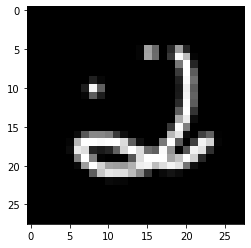

Image to be predicted...


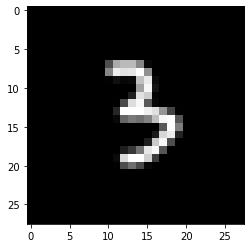

Image to be predicted...


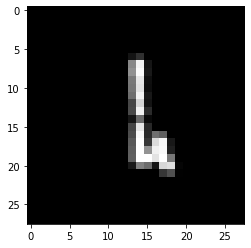

Image to be predicted...


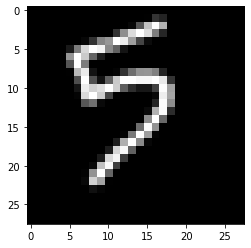

Image to be predicted...


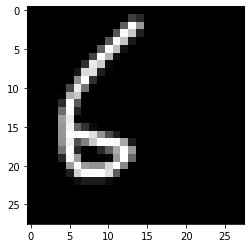

In [2]:
model = load_model('mnist5.h5')

def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    
    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
    
    print('Image to be predicted...')
    plt.imshow(img, cmap = 'gray')
    plt.show()
    
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    

    #predicting the class
#     the model predicts in batches, since we are just inferencing on one image threfore we just take the first array of 
#     ouptut in our variable 'res'.
    res = model.predict([img])[0]
    return np.argmax(res), max(res)

class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.x = self.y = 0
        
        # Creating elements
        self.title('Handwritten Digit Recognition')
        self.canvas = tk.Canvas(self, width=300, height=300, bg = 'black', cursor="cross")
        self.label = tk.Label(self, text="Draw..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command = self.classify_handwriting)   
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
       
    # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        
        self.canvas.bind("<B1-Motion>", self.draw_lines) # event handler for mouse events

    def clear_all(self):
        self.canvas.delete("all")
        
    def classify_handwriting(self):
        # code to convert drawing on canvas to an image
        HWND = self.canvas.winfo_id()        # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND)  # get the coordinate of the canvas
        a,b,c,d = rect
        rect=(a+4, b+4, c-4, d-4)            # padding to the image
        im = ImageGrab.grab(rect)
        
        # predict what the image is...
        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')

    def draw_lines(self, event):
        # draw on the canvas
        self.x = event.x
        self.y = event.y
        r= 8                                # control the width of strokes
        self.canvas.create_oval(self.x+r, self.y+r, self.x - r, self.y - r, fill='white',outline = 'white')
       
app = App()
mainloop()
